<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Local Search Practical Assignment (30 + 10 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this assignment you will solve the traveling salesman problem using hill climbing, simulated annealing and genetic algorithms.

In [1]:
# do not import other packages for this assignment
import matplotlib.pyplot as plt
import numpy as np
import random

The traveling salesperson problem (TSP) is a touring problem in which each city must be visited exactly once. The aim is to find the shortest tour. The problem is known to be NP-hard, but an enormous amount of effort has been expended to improve the capabilities of TSP algorithms. In addition to planning trips for traveling salespersons, these algorithms have been used for tasks such as planning movements of automatic circuit-board drills and of stocking machines on shop floors.

In this notebook we will use matplotlib library to visualize the problem. we represent each city as a point in a 800*800 rectnagle. the positions of the cities are randomly chosen. run the next codeblock to randomly choose the cities.

In [2]:
WIDTH = 800
HEIGHT = 800
CITY_NUM = 30


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y


cities = [City(np.random.randint(10,WIDTH-10),np.random.randint(10,HEIGHT-10)) for i in range(CITY_NUM)] 

The next function helps you visualize the problem.

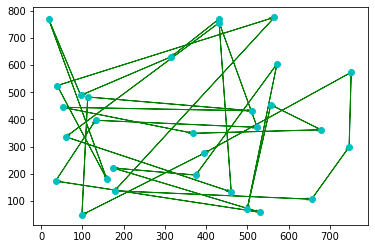

In [3]:
def plotTSP(cities):
    '''
    Inputs:
    - cities : list of cities. ordered by path
    '''
    x = []
    y = []
    for city in cities:
        x.append(city.x)
        y.append(city.y)
    plt.plot(x,y,'co')
    
    a_scale = float(max(x))/float(100)
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

plotTSP(cities)

complete the following helper functions. a test cases has been given to you to make sure your implement these functions correctly.

In [4]:
# 5 points

def get_distance_between_two_city(c1 : City, c2 : City):
    '''
    Inputs:
    - c1,c2 : the two cities of type City
    Output: Euclidean distance between them.
    '''
    x1 = c1.x
    y1 = c1.y
    x2 = c2.x
    y2 = c2.y

    distance= np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    return distance
    pass

def get_distance_tsp(cities):
    '''
    Inputs:
    - cities : list of cities of form [c1, c2, ..., cn]. ordered by path
    Output: tsp distance.
    '''
    tsp_distance = 0
    n = len(cities)
    for i in range(n):
        tsp_distance = tsp_distance + get_distance_between_two_city(cities[i], cities[(i + 1) % n])
    return tsp_distance

# testcase
c1 = City(10, 10)
c2 = City(10, 20)
c3 = City(20, 10)
c4 = City(40, 40)
get_distance_tsp([c1,c2,c3,c4])  # should be around 102.62

102.6240552495637

# Algorithm 1 : Hill Climbing (12 points)

implement a hill climbing algorithm for the problem. you dont have to add sideways move to the hill climbing algorithm. meaning that if a neighbor with a smaller path length does not exist you can terminate and return the existing path as the solution. we define a neighbouring solution as changing the place of two cities. for example if our solution is [c1, c2, c3, c4, c5] then one of the possible next solution would be [c4, c2, c3, c1, c5].   
at each timestep generate all the possible next solution and pick the best one. if one does not exist return the current solution.  

* make sure to use the .copy function when you want to have another copy of a list.
* print the the distance at each iteration of hill climbing

TSP distance at iteration 0: 12100.276191836447
TSP distance at iteration 1: 10965.942383220416
TSP distance at iteration 2: 9250.436931195984
TSP distance at iteration 3: 8409.598237580609
TSP distance at iteration 4: 7633.416419783264
TSP distance at iteration 5: 6934.696409494225
TSP distance at iteration 6: 6643.030057406835
TSP distance at iteration 7: 6401.526247653255
TSP distance at iteration 8: 6224.582626149383
TSP distance at iteration 9: 6095.6000497918885
TSP distance at iteration 10: 5979.613747219453
TSP distance at iteration 11: 5877.689392031725
TSP distance at iteration 12: 5824.333106016035
TSP distance at iteration 13: 5784.4312392567235
TSP distance at iteration 14: 5745.454996543868
TSP distance at iteration 15: 5725.220450592933
TSP distance at iteration 16: 5715.818058890231
TSP distance at iteration 17: 5706.89894731921
TSP distance at iteration 18: 5699.540303198994
initial path length=12100.276191836447, path length of hill climbing=5699.540303198994


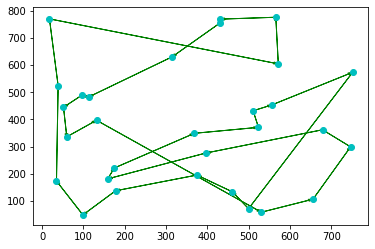

In [5]:
def tsp_hill_climbing(cities):
    '''
    Inputs:
    - cities   : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - solution : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    best_cities = cities[:]
    n = len(cities)
    iteration = 0
    while True:
        print(f'TSP distance at iteration {iteration}:', get_distance_tsp(best_cities))
        best_cities_temp = best_cities[:]
        for i in range(n - 1):
            for j in range(i + 1, n):
                new_cities = best_cities[:]
                changed_city = new_cities[i]
                new_cities[i] = new_cities[j]
                new_cities[j] = changed_city
                if get_distance_tsp(new_cities) < get_distance_tsp(best_cities_temp):
                    best_cities_temp = new_cities
        if get_distance_tsp(best_cities_temp) < get_distance_tsp(best_cities):
            best_cities = best_cities_temp
            iteration = iteration + 1
        else:
            return best_cities

solution = tsp_hill_climbing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 2: Simulated Annealing (13 points)

In this part we will use simulated annealing to solve the tsp problem. In order to generate a random neighbor of a state. choose two cities at random. then flip a fair coin and do one of the following based on the outcome.  
1 - change the position of the two cities (like algorithm 1)  
2 - reverse the cities between these two cities. example : our initial state is [1,2,3,4,5,6] and the two chosen cities are 2 and 5. the resulting neighbor will be [1,5,4,3,2,6] 
we will use exponential decay as a way to schedule the temparture. meaning that in each iteration the temperature is changed to alpha*temperature.    
at each iteration if the neighbour path length is less than the current state we accept that state as our current state. otherwise we will accept it based on the following probability:  
$$p= {e}^{-\frac{\Delta length}{T}}$$
stop the algorithm when temperature is less than a small number. here we will use the variable stopping_temperature for this.

TSP distance at iteration: 0 12100.276191836447
TSP distance at iteration: 1 12100.276191836447
TSP distance at iteration: 2 11575.721890847952
TSP distance at iteration: 3 11575.721890847952
TSP distance at iteration: 4 11575.721890847952
TSP distance at iteration: 5 11575.721890847952
TSP distance at iteration: 6 10878.829650094005
TSP distance at iteration: 7 10878.829650094005
TSP distance at iteration: 8 10878.829650094005
TSP distance at iteration: 9 10878.829650094005
TSP distance at iteration: 10 10828.561285951197
TSP distance at iteration: 11 10751.858763696835
TSP distance at iteration: 12 9963.645484835819
TSP distance at iteration: 13 9963.645484835819
TSP distance at iteration: 14 9963.645484835819
TSP distance at iteration: 15 9963.645484835819
TSP distance at iteration: 16 9873.136138082538
TSP distance at iteration: 17 9873.136138082538
TSP distance at iteration: 18 9873.136138082538
TSP distance at iteration: 19 9873.136138082538
TSP distance at iteration: 20 9873.136

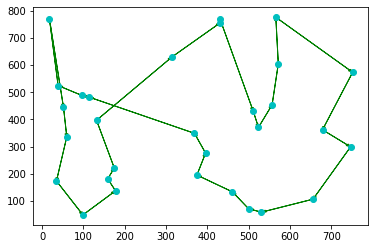

In [6]:
def get_neighbour_state(cities):
    '''
    Inputs:
    - cities    : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - neighbour : list of cities of form [c1, c2, ..., cn]. ordered by path.
                  find this neighbour based on the information above.
    '''
    new_cities = cities[:]
    x = random.randint(0, 1)
    city1 = random.randint(0, len(cities) - 1)
    city2 = random.randint(0, len(cities) - 1)
    if x == 1:
        changed_city = new_cities[city1]
        new_cities[city1] = new_cities[city2]
        new_cities[city2] = changed_city
    else:
        new_cities[city1:city2 + 1] = new_cities[city1:city2 + 1][::-1]
    return new_cities
        
         
def simulated_annealing(cities, T=200, alpha=0.99, stopping_temperature=1e-8):
    '''
    Inputs:
    - cities               : list of cities of form [c1, c2, ..., cn]. ordered by path.
    - T                    : the temperature value of simulated annealing.
    - alpha                : exponential decay factor for T.
    - stopping_temparature : stop the alogorithm if T drops below this.
    Output:
    - solution             : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    new_cities = cities[:]
    iteration = 0
    while T > stopping_temperature:
        print(f'TSP distance at iteration: {iteration}', get_distance_tsp(new_cities))
        neighbor_cities = get_neighbour_state(new_cities)
        if get_distance_tsp(neighbor_cities) < get_distance_tsp(new_cities):
            new_cities = neighbor_cities
        else:
            x = random.uniform(0, 1)
            p = np.exp((get_distance_tsp(new_cities) - get_distance_tsp(neighbor_cities)) / T)
            if x < p:
                new_cities = neighbor_cities
        T = T * alpha
        iteration = iteration + 1
    return new_cities



solution = simulated_annealing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of Simulated Annealing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 3: genetic algorithm (optional 10 points)

This part is optional and you can earn up to 10 extra point from it. In the theoretical part of this assignment, you created a genetic algorithm for the TSP problem. implement you algotihm here and plot the solution at the end.

In [7]:
import random

In [8]:
# your code
def create_route(cities):
    return random.sample(cities, len(cities))

def create_population(cities, population_size):
    population = []
    for i in range(population_size):
        population.append(create_route(cities))
    return population

In [9]:
def sort_population(population):
    sorted_population = []
    distance_cum_sum = 0
    for i in range(len(population)):
        l = []
        l.append(get_distance_tsp(population[i]))
        l.append(population[i])
        sorted_population.append(l)
    sorted_population = sorted(sorted_population, key=lambda x: (x[0]))
    for i in range(len(sorted_population)):
        distance_cum_sum = distance_cum_sum + sorted_population[i][0]
        sorted_population[i].append(distance_cum_sum)

    coeff = 100 / sorted_population[len(sorted_population) - 1][2]
    for i in range(len(sorted_population)):
        sorted_population[i][2] = sorted_population[i][2] * coeff
    return sorted_population
    

In [10]:
def selection(sorted_population, elite_size):
    selection_result = []
    for i in range(elite_size):
        selection_result.append(sorted_population[i][1])

    for i in range(len(sorted_population) - elite_size):
        pick = 100 * random.random()
        for j in range(len(sorted_population)):
            if pick <= sorted_population[j][2]:
                selection_result.append(sorted_population[j][1])
                break
    return selection_result

In [11]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [12]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def nextGeneration(population, eliteSize, mutationRate):
    sorted_population = sort_population(population)
    selected_result = selection(sorted_population, eliteSize)
    children = breedPopulation(selected_result, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def genetic_algorithm(cities, popSize, eliteSize, mutationRate, generations):
    iteration = []
    distances = []
    population = create_population(cities, popSize)
    for i in range(generations):
        iteration.append(i)
        distances.append(get_distance_tsp(population[0]))
        population = nextGeneration(population, eliteSize, mutationRate)
    plt.plot(iteration, distances)
    plt.grid()
    plt.xlabel("Generation")
    plt.ylabel("TSP Distance")
    plt.plot()
    return population[0]


initial path length=12100.276191836447, path length of Genetic Algorithm=3954.854944079981


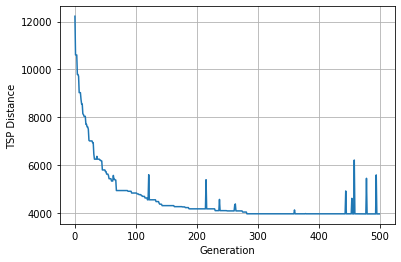

In [14]:
solution = genetic_algorithm(cities, 100, 30, 0.001, 500)
print(f'initial path length={get_distance_tsp(cities)}, path length of Genetic Algorithm={get_distance_tsp(solution)}')